#### QuickBasket EDA

Required imports

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

Datasets

In [2]:
orders_df = pd.read_csv('./datasets/order_metadata.csv')
products_df= pd.read_csv('./datasets/product_catalog.csv')
order_prior_df = pd.read_csv('./datasets/order_items__prior.csv')
aisle_df = pd.read_csv('./datasets/aisle_info.csv')
department_df = pd.read_csv('./datasets/department_info.csv')
order_train_df = pd.read_csv('./datasets/order_items__train.csv')

In [3]:
print(orders_df.shape)
print(order_prior_df.shape)
print(order_train_df.shape)

(3421083, 7)
(32434489, 4)
(1384617, 4)


Task 1 - Basic Insights

In [4]:

orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [5]:
# Data Cleaning

print('shape:',orders_df.shape)  
print(orders_df.info())      
print(orders_df.isnull().sum())
print('Duplicate rows: ',orders_df.duplicated().sum())

shape: (3421083, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
None
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64
Duplicate rows:  0


Number of Orders, Customers

In [6]:
total_orders=orders_df['order_id'].nunique()
total_customers= orders_df['user_id'].nunique()

print('Total Orders:',total_orders)
print('Total Customers:',total_customers)


Total Orders: 3421083
Total Customers: 206209


Number of Products, Aisles, Departments

In [7]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
print(products_df.shape)
print(products_df.info())
print(products_df.isnull().sum())
print('Duplicate rows: ',products_df.duplicated().sum())

(49688, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64
Duplicate rows:  0


In [9]:
total_products= products_df['product_id'].nunique()
total_aisles = products_df['aisle_id'].nunique()
total_departments = products_df['department_id'].nunique()

print('Number of products:',total_products)
print('Number of aisles:',total_aisles)
print('Number of departments:',total_departments)

Number of products: 49688
Number of aisles: 134
Number of departments: 21


Freuently Ordered Products

In [10]:
merged_df= order_prior_df.merge(products_df,on='product_id')
merged_df= merged_df.merge(aisle_df,on='aisle_id')
merged_df= merged_df.merge(department_df,on='department_id')
merged_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


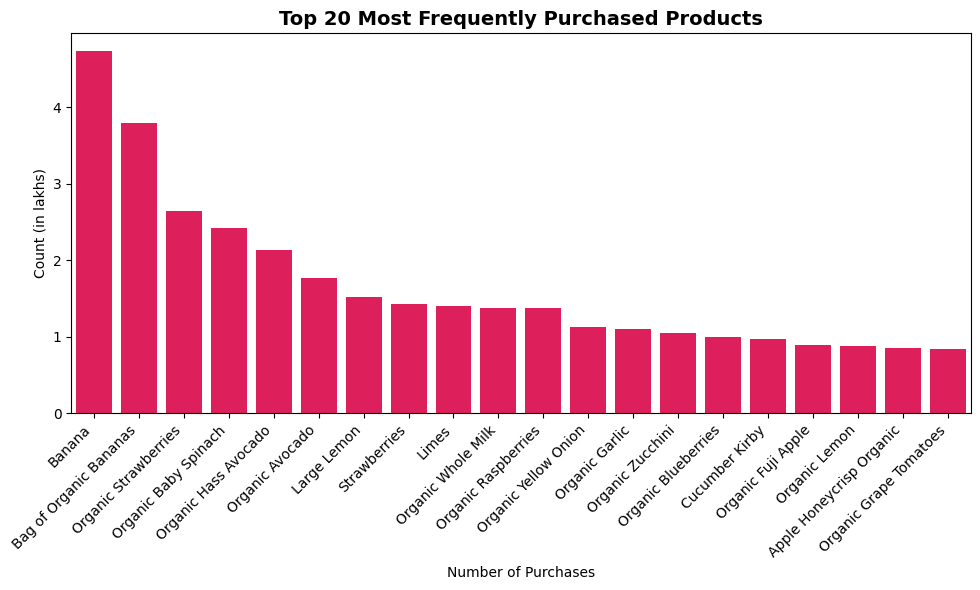

In [11]:
frequent_orders = merged_df['product_name'].value_counts().head(20).reset_index()
frequent_orders.columns=['product_name','count']
frequent_orders['count_lakhs']= frequent_orders['count']/1e5

plt.figure(figsize=(10,6))
sns.barplot(frequent_orders,x='product_name',y='count_lakhs',color="#fc0050")
plt.title('Top 20 Most Frequently Purchased Products',fontsize=14, fontweight='bold')
plt.xlabel('Number of Purchases')
plt.ylabel('Count (in lakhs)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Top Departments and Aisles

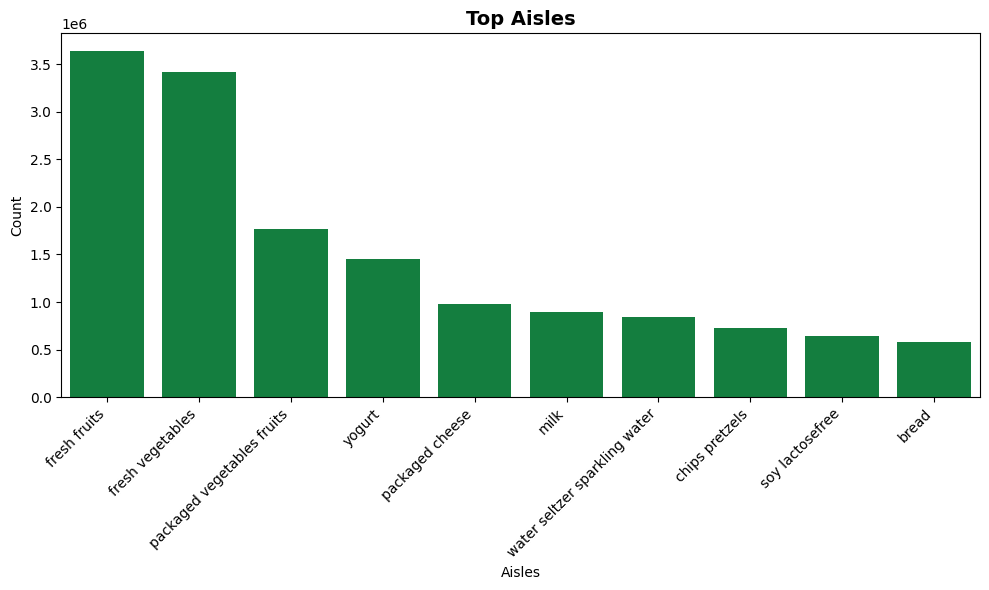

In [12]:
top_aisles = merged_df['aisle'].value_counts().reset_index()
top_aisles.columns=['aisle','count']

plt.figure(figsize=(10,6))
sns.barplot(top_aisles.head(10),x='aisle',y='count', color="#02903B" )
plt.title('Top Aisles',fontsize=14, fontweight='bold')
plt.xlabel('Aisles')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


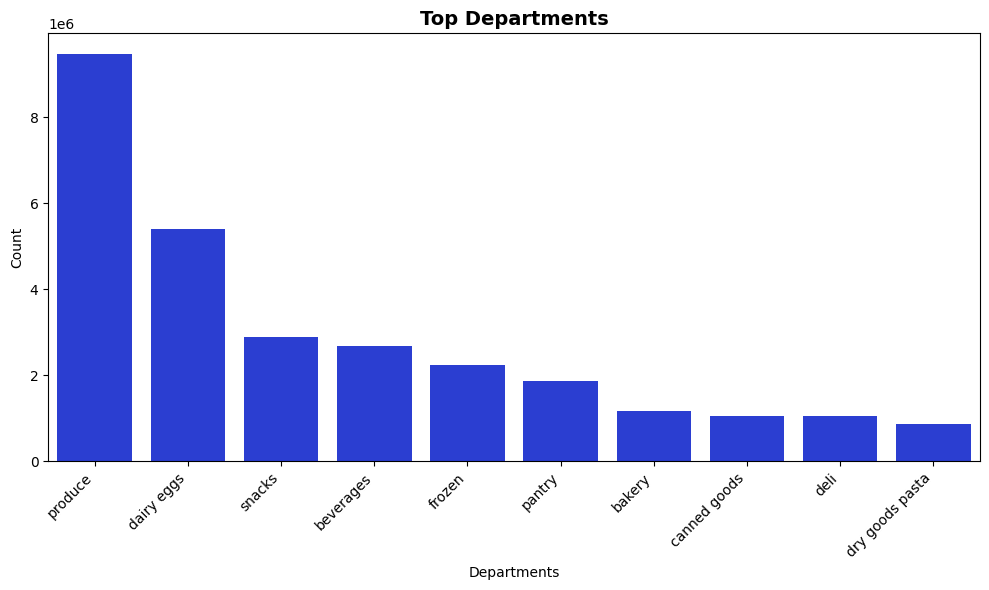

In [13]:
top_departments=merged_df['department'].value_counts().reset_index()
top_departments.columns=['department','count']

plt.figure(figsize=(10,6))
sns.barplot(top_departments.head(10),x='department',y='count', color="#0F29ED" )
plt.title('Top Departments',fontsize=14, fontweight='bold')
plt.xlabel('Departments')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Reorder Rate

In [14]:
total_orders= order_prior_df.groupby('product_id')['reordered'].count()
total_reorders=order_prior_df.groupby('product_id')['reordered'].sum()

reorder_rate = (total_reorders/total_orders).reset_index()
reorder_rate.columns=['product_id','reorder_rate']
reorder_df=reorder_rate.merge(products_df,on='product_id')

top_reorder_rate = reorder_df.sort_values('reorder_rate',ascending=False)
print(top_reorder_rate.head())

       product_id  reorder_rate                              product_name  \
6430         6433      0.941176                       Raw Veggie Wrappers   
2074         2075      0.931034  Serenity Ultimate Extrema Overnight Pads   
43545       43553      0.923077                       Orange Energy Shots   
27734       27740      0.920792                        Chocolate Love Bar   
14605       14609      0.914286                 Soy Powder Infant Formula   

       aisle_id  department_id  
6430         13             20  
2074        126             11  
43545        64              7  
27734        45             19  
14605        92             18  


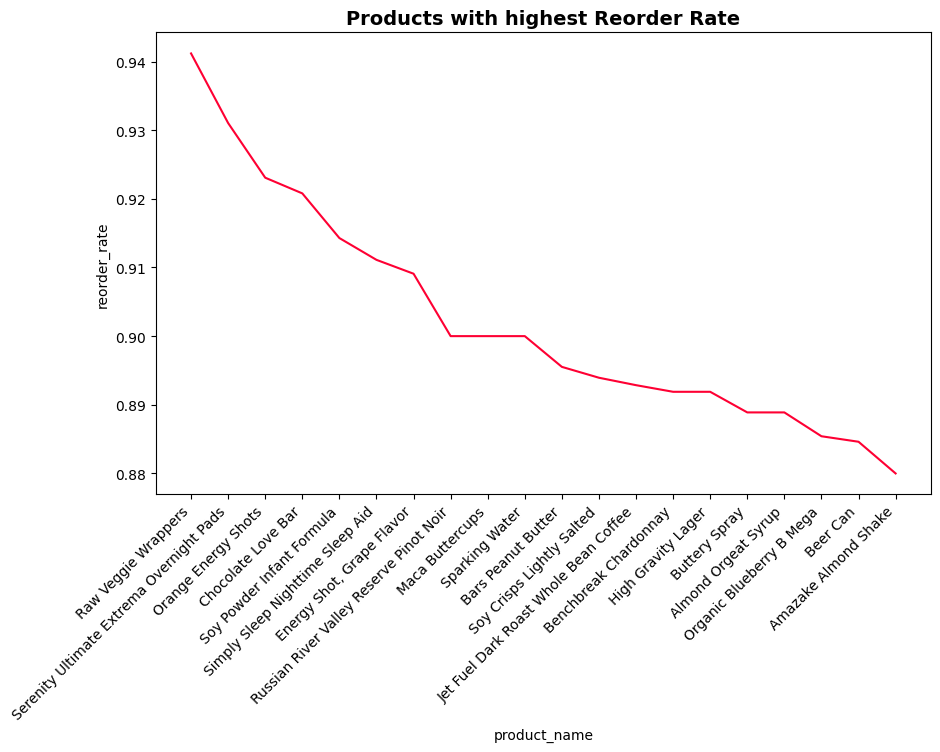

In [15]:
plt.figure(figsize=(10,6))
sns.lineplot(top_reorder_rate.head(20),x='product_name',y='reorder_rate',color="#FE0033")
plt.xticks(rotation=45,ha='right')
plt.title('Products with highest Reorder Rate',fontweight='bold',fontsize=14)
plt.show()

Average Basket Size

In [16]:
basket_size = order_prior_df.groupby('order_id')['product_id'].count().reset_index()
basket_size.columns = ['order_id', 'basket_size']

avg_basket_size = basket_size['basket_size'].mean()
print('Average basket size:',avg_basket_size)

Average basket size: 10.088883421247614


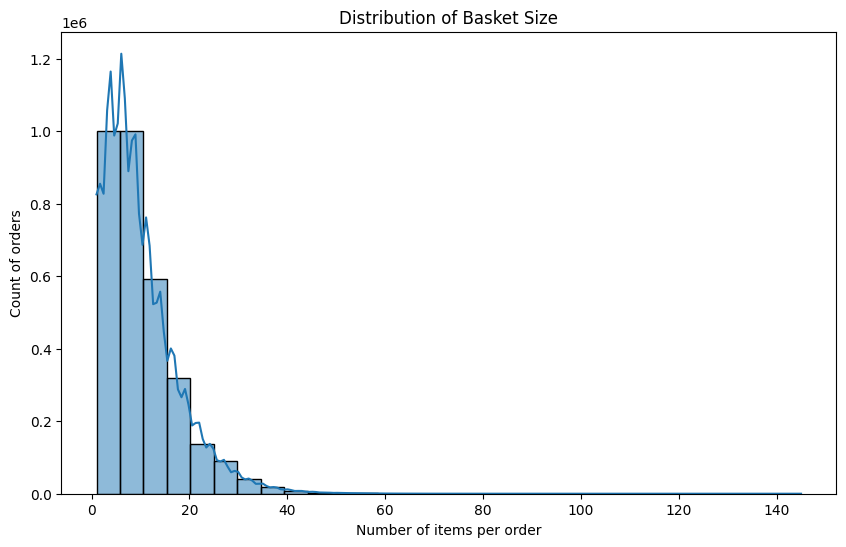

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(data=basket_size, x='basket_size', bins=30, kde=True)
plt.xlabel("Number of items per order")
plt.ylabel("Count of orders")
plt.title("Distribution of Basket Size")
plt.show()


Order trends by hour of the day

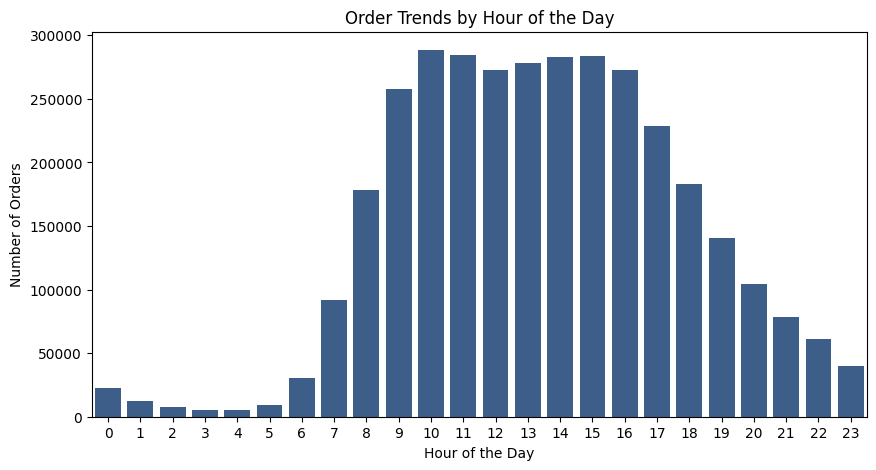

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data=orders_df, x='order_hour_of_day', color="#305D94")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.title("Order Trends by Hour of the Day")
plt.show()


Order Trends by Day of the Week

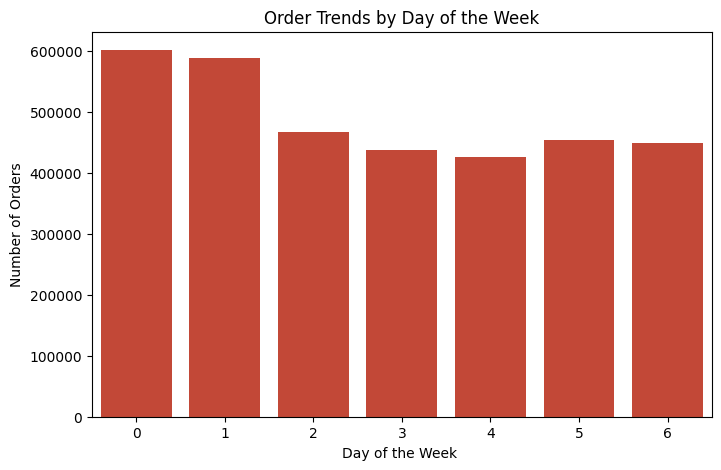

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(data=orders_df, x='order_dow', color="#d93620")
plt.xlabel("Day of the Week ")
plt.ylabel("Number of Orders")
plt.title("Order Trends by Day of the Week")
plt.show()


Order Trends by Days Since Prior Order

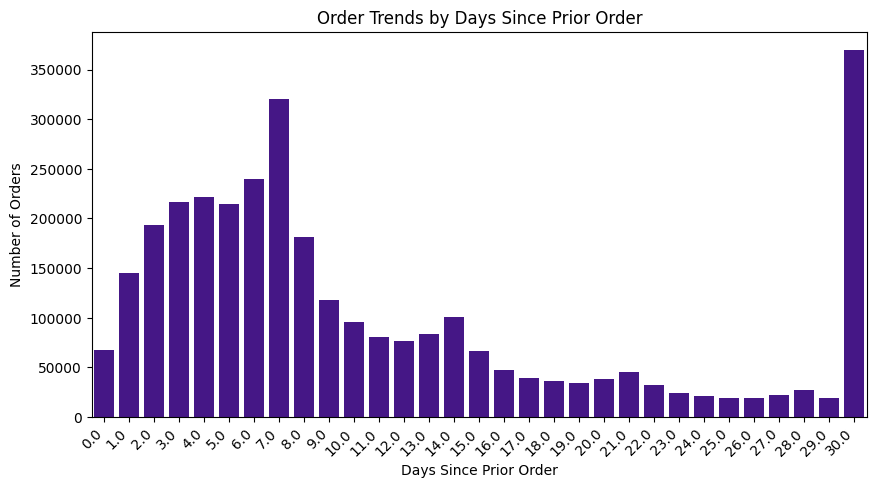

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=orders_df, x='days_since_prior_order', color="#420499")
plt.xlabel("Days Since Prior Order")
plt.ylabel("Number of Orders")
plt.title("Order Trends by Days Since Prior Order")
plt.xticks(rotation=45,ha='right')
plt.show()


#### Features Selection

In [43]:
#  Created new dataframe for basket size prediction
basket_df = order_prior_df.groupby('order_id')['product_id'].count().reset_index()
basket_df.columns=['order_id','basket_size']
basket_df = orders_df.merge(basket_df,on='order_id',how='right').drop(columns= ['eval_set'])
basket_df = basket_df.sort_values(by='user_id')
basket_df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,basket_size
2253888,2398795,1,2,3,7,15.0,6
2921151,3108588,1,8,1,14,14.0,6
516695,550135,1,7,1,9,20.0,5
2386095,2539329,1,1,2,8,NaN,5
2396411,2550362,1,10,4,8,30.0,9


In [45]:
basket_df.to_pickle('basket_df.pkl')